## Esercizio 1
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``testE.mat``.  La soluzione esatta del problema è il vettore x=[1,1,1,...1].Risolvere il sistema utilizzando i diversi metodi adatti visti a lezione adatti per risolverlo ed individuare il metodo più efficiente. Commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testE.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``

In [21]:
import numpy as np
import RisolviSis as rs
import matplotlib.pyplot as plt
import scipy.linalg as spl
from scipy.io import loadmat
dati = loadmat('testE.mat')
A = dati["A"]
b = dati["b"]

In [6]:
m, n = A.shape
print(A.shape)

(100, 100)


In [7]:
if (np.all(A.T == A) == True):
    print("Matrice simmetrica")
else:
    print("Matrice non simmetrica")

Matrice non simmetrica


In [8]:
def verifica_diag(A):
    n = A.shape[0]
    flag = True
    for i in range (n):
        el_diag = np.abs(A[i, i])
        sum_extradiag = np.sum(np.abs(A[i, :]) - np.abs(A[i, i]))
        if el_diag < sum_extradiag:
            print("Matrice non a diagonale dominante")
            flag = False
            return flag
        
    return flag

In [9]:
diag = verifica_diag(A)
print("Matrice a diagonale dominante? ", diag)

Matrice a diagonale dominante?  True


In [19]:
def jacobi(A,b,x0,toll,it_max):
    d = np.diag(A)
    errore=1000
    M = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    N = - (E + F)
    invM = np.diag(1/d)
    T=np.dot(np.linalg.inv(M), N)
    eig = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(eig)) 
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
             
    er_vet=[]
    while it <= it_max and errore >= toll:
        x = (b + np.dot(N, x0)) / d.reshape((n, 1))
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [25]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1) 
    M = D + E
    N = -F
    T=np.dot(np.linalg.inv(M), N)
    eig = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(eig))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it <= it_max and errore >= toll: 
        temp = b + np.dot(N, x0)
        x, flag = rs.Lsolve(M, temp)
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x) 
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [31]:
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d = np.diag(A) 
    D=np.diag(d)
    E = np.tril(A, -1) 
    F = np.triu(A, 1) 
    #Calcolo della matrice di iterazione di Gassu_Seidel SOR
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.dot(np.linalg.inv(Momega), Nomega)
    eig = np.linalg.eigvals(T) 
    raggiospettrale = np.max(np.abs(eig)) 
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M = D + E
    N = -F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp = b + np.dot(N, xold) 
        xtilde, flag = rs.Lsolve(M, temp) 
        xnew = (1-omega)*xold + omega*xtilde
        errore = np.linalg.norm(xnew - xold) / np.linalg.norm(xnew) 
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

raggio spettrale jacobi 0.9997193113493894
raggio spettrale Gauss-Seidel  0.9994387014848923
raggio spettrale Gauss-Seidel SOR  0.9986899761478689
Iterazioni Jacobi =  36047
Iterazioni Gauss-Seidel =  19259
Iterazioni Gauss-Seidel-SOR =  14183


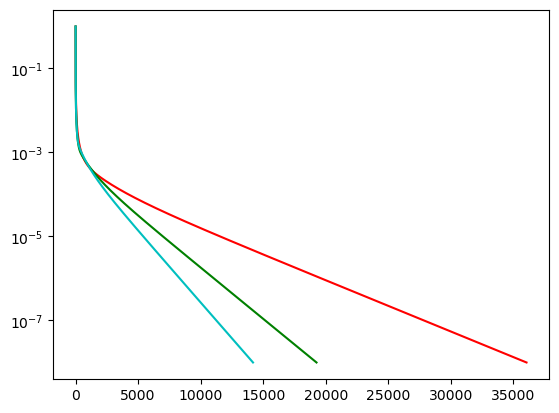

In [32]:
x0 = np.zeros(A.shape[0]).reshape(n, 1)
tol = 1e-8
it_max = 100000
omega = 1.4
solJ, itJ, erJ = jacobi(A, b, x0, tol, it_max)
solGS, itGS, erGS = gauss_seidel(A, b, x0, tol, it_max)
solGSor, itGSor, erGSor = gauss_seidel_sor(A, b, x0, tol, it_max, omega)
print("Iterazioni Jacobi = ", itJ)
print("Iterazioni Gauss-Seidel = ", itGS)
print("Iterazioni Gauss-Seidel-SOR = ", itGSor)
plt.semilogy(np.arange(itJ), erJ, "r-", np.arange(itGS), erGS, "g-", np.arange(itGSor), erGSor, "c-")

## Esercizio 2 
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``testF.mat``.Risolvere il sistema utilizzando il metodo più adatto. Commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testF.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``

In [33]:
dati = loadmat('testF.mat')
A = dati["A"]
b = dati ["b"]

In [34]:
m, n = A.shape
print(A.shape)

(50, 19)


In [38]:
U, s, VT = spl.svd(A)
rank = np.linalg.matrix_rank(A)
print("Rango = ", rank)
if rank < n:
    print("La matrice non ha rango massimo")
else:
    print("La matrice ha rango massimo")

Rango =  15
La matrice non ha rango massimo


In [41]:
def SVDLS(A,b):
     #Calcola la fattorizzazione SVD di A e utilizzala per calcolare
    #la soluzione nel senso dei minimi quadrati di Ax=b
    n = A.shape[0]
    U, s, VT = spl.svd(A)
    V = VT.T
        
        
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
     
    d = U.T @ b
    d1 = d[:k].reshape(k, 1) 
    s1 = s[:k].reshape(k, 1) 
    #Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
    c = d1 / s1  
    x=V[:,:k]@c 
    residuo = np.linalg.norm(d[k:])**2 
    return x,residuo

In [43]:
x, residuo = SVDLS(A, b)
print("Soluzione nel senso dei minimi quadrati\n", x)
print("Residuo = ", residuo)
print("Norma della soluzione ", np.linalg.norm(x))

Soluzione nel senso dei minimi quadrati
 [[ 8.93308674e-01]
 [ 5.99593662e-02]
 [-1.00818890e-04]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.08594726e+00]
 [ 1.16319260e+00]
 [ 9.47694272e-01]
 [ 9.09857191e-01]]
Residuo =  4.3087582643171665e-27
Norma della soluzione  4.130358162106168
